### Data Collection of MKBHD YouTube Channel. 

In [2]:
#import necessary libraries 
from googleapiclient.discovery import build
import pandas as pd
import datetime
!pip install textblob
from textblob import TextBlob
import operator 


ModuleNotFoundError: No module named 'googleapiclient'

In [ ]:
# Set up YouTube Data API
api_key = ' '
channelId='UCBJycsmduvYEL83R_U4JriQ'
youtube = build('youtube', 'v3', developerKey=api_key)

Function to Get Channel Statistics.

In [ ]:
def get_channel_stats(youtube,channelId):
  request = youtube.channels().list(
              part='snippet,contentDetails,statistics',
              id=channelId)
  response=request.execute()

  data = dict(Channel_name = response['items'][0]['snippet']['title'],
              Subscribers = response['items'][0]['statistics']['subscriberCount'],
              Total_videos = response['items'][0]['statistics']['videoCount'],
              Views = response['items'][0]['statistics']['viewCount'],)

  return data

In [ ]:
get_channel_stats(youtube,channelId)

{'Channel_name': 'Marques Brownlee',
 'Subscribers': '18700000',
 'Total_videos': '1648',
 'Views': '4198352160'}

In [ ]:
# Scraping the Channel for the previous 1 year Statistics

# Setting up YouTube Data API
api_key = ' '
youtube = build('youtube', 'v3', developerKey=api_key)

# Function to fetch video details by video ID
def fetch_video_details(video_id):
    response = youtube.videos().list(
        part='snippet,statistics',
        id=video_id
    ).execute()
    return response['items'][0] if response['items'] else None

# Function to fetch videos uploaded by Marques Brownlee in the past 1 year
def fetch_videos():
    one_year_ago = (datetime.datetime.now() - datetime.timedelta(days=365)).strftime('%Y-%m-%dT%H:%M:%SZ')
    videos = []
    next_page_token = None
    while True:
        response = youtube.search().list(
            part='snippet',
            channelId='UCBJycsmduvYEL83R_U4JriQ',  # Marques Brownlee's channel ID
            maxResults=50,
            type='video',
            publishedAfter=one_year_ago,
            pageToken=next_page_token
        ).execute()
        video_ids = [item['id']['videoId'] for item in response['items']]
        for video_id in video_ids:
            video_details = fetch_video_details(video_id)
            if video_details:
                videos.append(video_details)
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break
    return videos

# Fetch videos
videos = fetch_videos()

# Extract relevant statistics for each video
video_data = []
for video in videos:
    video_info = {
        'video_title': video['snippet']['title'],
        'publishedAt': video['snippet']['publishedAt']
    }
    statistics = video.get('statistics', {})
    video_info['views'] = int(statistics.get('viewCount', 0))
    video_info['likes'] = int(statistics.get('likeCount', 0))
    video_info['comments_count'] = int(statistics.get('commentCount', 0))
    video_data.append(video_info)

# Convert to DataFrame
df = pd.DataFrame(video_data)

# Display descriptive statistics
df.describe()

,views,likes,comments_count
count,1.070000e+02,1.070000e+02,107.000000
mean,5.491096e+06,1.976007e+05,8277.196262
std,5.268298e+06,1.962986e+05,8561.879706
min,8.198600e+05,3.876300e+04,681.000000
25%,3.026792e+06,9.926300e+04,3615.500000
50%,3.749323e+06,1.287650e+05,5671.000000
75%,5.479464e+06,2.235440e+05,8960.000000
max,3.563254e+07,1.721759e+06,41295.000000


In [ ]:
#Getting the Top 10 Videos by view count

# Order the videos based on views from highest to lowest
df_sorted = df.sort_values(by='views', ascending=False)

# Display the top 10 videos
top_10_videos = df_sorted.head(10)
print("Top 10 Videos:")
top_10_videos

Top 10 Videos:


,video_title,publishedAt,views,likes,comments_count
12,The World's Largest iPhone Has a Secret...,2023-06-22T04:03:29Z,35632536,1721759,6440
96,Using Apple Vision Pro: What It’s Actually Like!,2024-01-31T14:52:28Z,26413819,561486,32843
97,Driving Tesla Cybertruck: Everything You Need ...,2023-12-01T11:00:32Z,20892822,441283,41295
100,Driving Tesla Cybertruck: Everything You Need ...,2023-12-01T11:00:32Z,20892822,441283,41295
102,Apple Vision Pro Impressions!,2023-06-06T06:39:07Z,18090067,537363,39874
99,Apple Vision Pro Impressions!,2023-06-06T06:39:07Z,18090067,537363,39874
4,This Airless Basketball is 3D Printed!,2024-02-19T18:23:36Z,14966397,696332,9912
86,iPhone 15/15 Pro Impressions: Not Just USB-C!,2023-09-13T05:39:41Z,14034594,361255,25852
88,Tesla Solar Roof Review: Was it Worth It?,2023-07-29T00:56:53Z,11338590,387050,24672
10,The Most Tech I've Ever Seen in a Car!,2023-05-19T17:59:11Z,11034277,553312,6074


<ipython-input-10-7e700bb697e4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views', y='video_title', data=top_10_videos, palette='viridis')


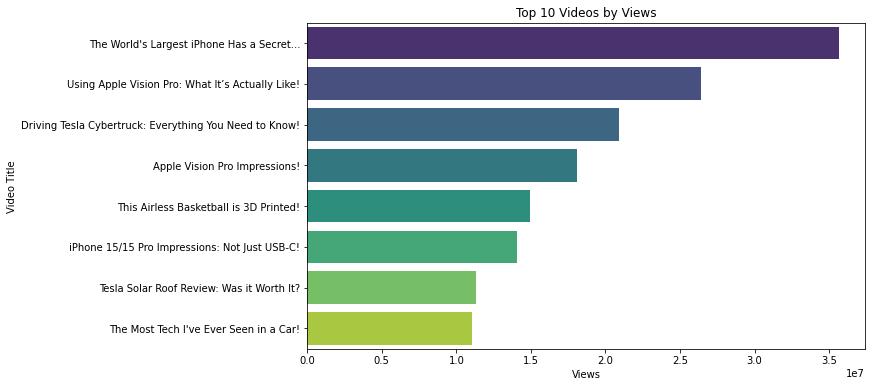

In [ ]:
# Visualize the top 10 videos on a bar chart
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='views', y='video_title', data=top_10_videos, palette='viridis')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.title('Top 10 Videos by Views')
plt.show()

In [ ]:
#Let's create a DataFrame

# Data as list of dictionaries
data = [
    {"Video ID": "FNnK1J-BdiM", "Title": "The World's Largest iPhone Has a Secret...", "View Count": 32218826, "Like Count": 1661398, "Comment Count": 6189},
    {"Video ID": "dtp6b76pMak", "Title": "Using Apple Vision Pro: What It’s Actually Like!", "View Count": 26343760, "Like Count": 560721, "Comment Count": 32824},
    {"Video ID": "XxOh12Uhg08", "Title": "Driving Tesla Cybertruck: Everything You Need to Know", "View Count": 20859755, "Like Count": 441047, "Comment Count": 41309},
    {"Video ID": "OFvXuyITwBI", "Title": "Apple Vision Pro Impressions!", "View Count": 18088060, "Like Count": 537500, "Comment Count": 39895},
    {"Video ID": "cShtHM7cFR0", "Title": "This Airless Basketball is 3D Printed!", "View Count": 14409348, "Like Count": 679003, "Comment Count": 9688},
    {"Video ID": "enR58PYHaWw", "Title": "iPhone 15/15 Pro Impressions: Not Just USB-C!", "View Count": 14029444, "Like Count": 361318, "Comment Count": 25865},
    {"Video ID": "UJeSWbR6W04", "Title": "Tesla Solar Roof Review: Was it Worth It?", "View Count": 11155676, "Like Count": 383051, "Comment Count": 24422},
    {"Video ID": "UXB9bnuyZb4", "Title": "The Most Tech I've Ever Seen in a Car!", "View Count": 10331467, "Like Count": 541207, "Comment Count": 5904},
    {"Video ID": "YWTgoUqm3tY", "Title": "Electric Scooter INSIDE a Briefcase!", "View Count": 9094561, "Like Count": 416845, "Comment Count": 5634},
    {"Video ID": "cBpGq-vDr2Y", "Title": "iPhone 15 Pro Review: The Good, The Bad, & The Ugly", "View Count": 9069552, "Like Count": 241223, "Comment Count": 17812}
]


df = pd.DataFrame(data)

# Display the DataFrame
df


,Video ID,Title,View Count,Like Count,Comment Count
0,FNnK1J-BdiM,The World's Largest iPhone Has a Secret...,32218826,1661398,6189
1,dtp6b76pMak,Using Apple Vision Pro: What It’s Actually Like!,26343760,560721,32824
2,XxOh12Uhg08,Driving Tesla Cybertruck: Everything You Need ...,20859755,441047,41309
3,OFvXuyITwBI,Apple Vision Pro Impressions!,18088060,537500,39895
4,cShtHM7cFR0,This Airless Basketball is 3D Printed!,14409348,679003,9688
5,enR58PYHaWw,iPhone 15/15 Pro Impressions: Not Just USB-C!,14029444,361318,25865
6,UJeSWbR6W04,Tesla Solar Roof Review: Was it Worth It?,11155676,383051,24422
7,UXB9bnuyZb4,The Most Tech I've Ever Seen in a Car!,10331467,541207,5904
8,YWTgoUqm3tY,Electric Scooter INSIDE a Briefcase!,9094561,416845,5634
9,cBpGq-vDr2Y,"iPhone 15 Pro Review: The Good, The Bad, & The...",9069552,241223,17812


In [ ]:
# Save to CSV
df.to_csv('top_videos.csv', index=False)


#### Our Focus is on the Apple Vision Pro Product Review

In [ ]:
# #Fetching comments from the 2 videos
def fetch_comments(video_id):
    comments = []
    next_page_token = None
    while True:
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=50,
            pageToken=next_page_token
        ).execute()
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append({
                'comment_text': comment['textDisplay'],
                'author': comment['authorDisplayName'],
                'likes': comment['likeCount'],
                'timestamp': comment['publishedAt']
            })
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break
    return comments

In [ ]:

# Use of Video IDs
video_ids = ['dtp6b76pMak', 'OFvXuyITwBI']

# Fetch comments for each video
all_comments = []
for video_id in video_ids:
    video_comments = fetch_comments(video_id)
    all_comments.extend(video_comments)

In [ ]:
# Convert the list of comment dictionaries to a DataFrame
comments_df = pd.DataFrame(all_comments)

# Save the DataFrame to a CSV file
comments_df.to_csv('youtube_comments.csv', index=False)

comments_df

,comment_text,author,likes,timestamp
0,I watched an youtube video on Quest 3 and then...,@Andrew-sx4re,0,2024-04-29T17:52:18Z
1,it’s not becoming mainstream till that battery...,@Cryptic0III,0,2024-04-29T08:19:15Z
2,<b>***Don&#39;t be a silly customer to buy iph...,@jaskenlee,0,2024-04-29T01:12:46Z
3,The major problems are nothing can be connecte...,@Not-A-Woke-Liberal,0,2024-04-28T18:30:24Z
4,Very well explained 😊,@kwesigaalex4765,0,2024-04-28T17:43:44Z
...,...,...,...,...
59248,Hi,@spectaculaishn,0,2023-06-06T06:39:28Z
59249,Just before my flight lets gooo🎉,@siddharthl_12,1,2023-06-06T06:39:27Z
59250,Hi,@ZyebCookies,1,2023-06-06T06:39:27Z
59251,First,@user-fx6tp3gs8s,1,2023-06-06T06:39:27Z


### Data Cleaning 


In [ ]:
# Checking for duplicated rows
duplicates = comments_df.duplicated()

# Display duplicated rows
comments_df[duplicates]

,comment_text,author,likes,timestamp,cleaned_text,is_english
4162,The renders from 2012 are reality,@user-cg7oq8cy9q,0,2024-02-05T16:04:42Z,the renders from are reality,True
41904,Its not gaming focused...im trying to figure o...,@rosecity_chris,0,2023-06-06T18:51:44Z,its not gaming focusedim trying to figure out ...,True
52271,"Apple can never compete in VR, cause they are ...",@jasonhunter6125,0,2023-06-06T09:38:06Z,apple can never compete in vr cause they are s...,True
53754,porn is the best application of this,@religionbuster7180,0,2023-06-06T08:33:24Z,porn is the best application of this,True


##### upon reviewing the comments they are not the same and the authors differ. Therefore, we wont drop the comments.

In [ ]:
from bs4 import BeautifulSoup
import re

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Clean the 'comment_text' column
comments_df['cleaned_text'] = comments_df['comment_text'].apply(clean_text)

c:\Users\Lorrah\anaconda3\envs\learn-env\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "......" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\Lorrah\anaconda3\envs\learn-env\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\Lorrah\anaconda3\envs\learn-env\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "..." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [ ]:
#inspect the 'clean_text'
comments_df.head(10)

,comment_text,author,likes,timestamp,cleaned_text,is_english
0,I watched an youtube video on Quest 3 and then...,@Andrew-sx4re,0,2024-04-29T17:52:18Z,i watched an youtube video on quest and then ...,True
1,it’s not becoming mainstream till that battery...,@Cryptic0III,0,2024-04-29T08:19:15Z,its not becoming mainstream till that battery ...,True
2,<b>***Don&#39;t be a silly customer to buy iph...,@jaskenlee,0,2024-04-29T01:12:46Z,dont be a silly customer to buy iphone anymore...,True
3,The major problems are nothing can be connecte...,@Not-A-Woke-Liberal,0,2024-04-28T18:30:24Z,the major problems are nothing can be connecte...,True
4,Very well explained 😊,@kwesigaalex4765,0,2024-04-28T17:43:44Z,very well explained,True
5,I just have one concern. I just moved to NYC a...,@imhisgrandson_1345,0,2024-04-28T17:15:48Z,i just have one concern i just moved to nyc an...,True
6,I’ll get it once it reaches 3rd gen,@minisculex3,0,2024-04-28T15:53:58Z,ill get it once it reaches rd gen,True
7,I could see this being used in the design indu...,@rakeemwilliams6426,0,2024-04-28T10:15:16Z,i could see this being used in the design indu...,True
8,Problem with personas is the eyes aren’t accur...,@StelmachsWorld,1,2024-04-27T20:22:10Z,problem with personas is the eyes arent accura...,True
9,I did a demo today and I was absolutely impres...,@q.l5480,0,2024-04-27T05:08:10Z,i did a demo today and i was absolutely impres...,True


In [ ]:
# Check for empty rows
empty_rows = comments_df[comments_df['cleaned_text'].isnull() | (comments_df['cleaned_text'] == '')]

# Display empty rows
empty_rows.sample(10)

,comment_text,author,likes,timestamp,cleaned_text,is_english
30638,❤,@buzzdiggytv7731,0,2023-06-11T17:03:02Z,,False
48486,😍,@DaSwitchGamer,0,2023-06-06T12:51:24Z,,False
58809,❤,@jeswinjohn6864,0,2023-06-06T06:40:19Z,,False
11350,هلا,@user-wb7ww3zm2m,0,2024-02-02T11:55:08Z,,False
26207,😂😂😂😂😂😂😂😂😂😂😂😂😂,@PeresD,0,2024-01-31T15:24:56Z,,False
37156,♥️♥️♥️♥️♥️♥️♥️,@YousefSalamaa1,0,2023-06-07T06:26:34Z,,False
40276,👍🏾,@ernestorodriguez791,0,2023-06-06T21:44:17Z,,False
36466,😮😮😮,@ofwz,0,2023-06-07T11:23:29Z,,False
59015,👀👀,@benjaminurban2582,0,2023-06-06T06:39:50Z,,False
15998,👁👁,@pramotenoiin,0,2024-02-01T02:54:35Z,,False


#### They are considered empty because the comments are not in English

In [ ]:
from langdetect import detect, LangDetectException

def is_english(text):
    try:
        # Returns True if the detected language is English
        return detect(text) == 'en'
    except LangDetectException:
        # Handle exception if text is too short or any other issue
        return False

# Assuming comments_df is your DataFrame containing the comments
comments_df['is_english'] = comments_df['cleaned_text'].apply(is_english)
english_comments_df = comments_df[comments_df['is_english']]


In [ ]:
english_comments_df.head()

,comment_text,author,likes,timestamp,cleaned_text,is_english
0,I watched an youtube video on Quest 3 and then...,@Andrew-sx4re,0,2024-04-29T17:52:18Z,i watched an youtube video on quest and then ...,True
1,it’s not becoming mainstream till that battery...,@Cryptic0III,0,2024-04-29T08:19:15Z,its not becoming mainstream till that battery ...,True
2,<b>***Don&#39;t be a silly customer to buy iph...,@jaskenlee,0,2024-04-29T01:12:46Z,dont be a silly customer to buy iphone anymore...,True
3,The major problems are nothing can be connecte...,@Not-A-Woke-Liberal,0,2024-04-28T18:30:24Z,the major problems are nothing can be connecte...,True
4,Very well explained 😊,@kwesigaalex4765,0,2024-04-28T17:43:44Z,very well explained,True


In [ ]:
#Identify Non-English Comments
non_english_comments_df = comments_df[comments_df['is_english'] == False]
non_english_comments_df.count()

comment_text    5271
author          5271
likes           5271
timestamp       5271
cleaned_text    5271
is_english      5271
dtype: int64

In [ ]:
# Get indices of non-English comments
non_english_indices = comments_df[comments_df['is_english'] == False].index

# Drop these rows
comments_df.drop(index=non_english_indices, inplace=True)

# Optional: Drop the 'is_english' column
comments_df.drop(columns='is_english', inplace=True)


In [ ]:
print(comments_df.head())  # View the first few entries
print("Remaining comments count:", len(comments_df))  # Count the remaining comments
comments_df


                                        comment_text               author  \
0  I watched an youtube video on Quest 3 and then...        @Andrew-sx4re   
1  it’s not becoming mainstream till that battery...         @Cryptic0III   
2  <b>***Don&#39;t be a silly customer to buy iph...           @jaskenlee   
3  The major problems are nothing can be connecte...  @Not-A-Woke-Liberal   
4                              Very well explained 😊     @kwesigaalex4765   

   likes             timestamp  \
0      0  2024-04-29T17:52:18Z   
1      0  2024-04-29T08:19:15Z   
2      0  2024-04-29T01:12:46Z   
3      0  2024-04-28T18:30:24Z   
4      0  2024-04-28T17:43:44Z   

                                        cleaned_text  
0  i watched an youtube video on quest  and then ...  
1  its not becoming mainstream till that battery ...  
2  dont be a silly customer to buy iphone anymore...  
3  the major problems are nothing can be connecte...  
4                               very well explained   
Re

,comment_text,author,likes,timestamp,cleaned_text
0,I watched an youtube video on Quest 3 and then...,@Andrew-sx4re,0,2024-04-29T17:52:18Z,i watched an youtube video on quest and then ...
1,it’s not becoming mainstream till that battery...,@Cryptic0III,0,2024-04-29T08:19:15Z,its not becoming mainstream till that battery ...
2,<b>***Don&#39;t be a silly customer to buy iph...,@jaskenlee,0,2024-04-29T01:12:46Z,dont be a silly customer to buy iphone anymore...
3,The major problems are nothing can be connecte...,@Not-A-Woke-Liberal,0,2024-04-28T18:30:24Z,the major problems are nothing can be connecte...
4,Very well explained 😊,@kwesigaalex4765,0,2024-04-28T17:43:44Z,very well explained
...,...,...,...,...,...
59245,First,@kumarkolhe9308,0,2023-06-06T06:39:29Z,first
59247,Claim your “here within an hour” ticket right ...,@Yashuop,14876,2023-06-06T06:39:28Z,claim your here within an hour ticket right here
59249,Just before my flight lets gooo🎉,@siddharthl_12,1,2023-06-06T06:39:27Z,just before my flight lets gooo
59251,First,@user-fx6tp3gs8s,1,2023-06-06T06:39:27Z,first


### E.D.A

#Tokenization and removal of stopwords

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lorrah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lorrah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Downloading the stopwords corpus and punkt tokenizer
# nltk.download('stopwords')
# nltk.download('punkt')

# Defining a function to tokenize text and remove stopwords
def tokenize_and_remove_stopwords(text):
    # Tokenizing the text into words
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    return filtered_tokens

# Applying the function to each row in the 'cleaned_text' column
comments_df['tokenized_text'] = comments_df['cleaned_text'].apply(tokenize_and_remove_stopwords)

# Displaying the first few rows of the DataFrame with tokenized text
comments_df[['cleaned_text', 'tokenized_text']].head()

,cleaned_text,tokenized_text
0,i watched an youtube video on quest and then ...,"[watched, youtube, video, quest, pc, monitor, ..."
1,its not becoming mainstream till that battery ...,"[becoming, mainstream, till, battery, integrated]"
2,dont be a silly customer to buy iphone anymore...,"[dont, silly, customer, buy, iphone, anymore, ..."
3,the major problems are nothing can be connecte...,"[major, problems, nothing, connected, harddriv..."
4,very well explained,"[well, explained]"


#Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lorrah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get POS tag for each token
def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Define a function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

# Apply lemmatization to the tokenized_text column
comments_df['lemmatized_text'] = comments_df['tokenized_text'].apply(lemmatize_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lorrah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [ ]:
# Display the DataFrame with the lemmatized text
comments_df.head(5)

,comment_text,author,likes,timestamp,cleaned_text,tokenized_text,lemmatized_text
0,I watched an youtube video on Quest 3 and then...,@Andrew-sx4re,0,2024-04-29T17:52:18Z,i watched an youtube video on quest and then ...,"[watched, youtube, video, quest, pc, monitor, ...","[watch, youtube, video, quest, pc, monitor, do..."
1,it’s not becoming mainstream till that battery...,@Cryptic0III,0,2024-04-29T08:19:15Z,its not becoming mainstream till that battery ...,"[becoming, mainstream, till, battery, integrated]","[become, mainstream, till, battery, integrate]"
2,<b>***Don&#39;t be a silly customer to buy iph...,@jaskenlee,0,2024-04-29T01:12:46Z,dont be a silly customer to buy iphone anymore...,"[dont, silly, customer, buy, iphone, anymore, ...","[dont, silly, customer, buy, iphone, anymore, ..."
3,The major problems are nothing can be connecte...,@Not-A-Woke-Liberal,0,2024-04-28T18:30:24Z,the major problems are nothing can be connecte...,"[major, problems, nothing, connected, harddriv...","[major, problem, nothing, connect, harddrivesm..."
4,Very well explained 😊,@kwesigaalex4765,0,2024-04-28T17:43:44Z,very well explained,"[well, explained]","[well, explain]"


In [ ]:
# Create a new DataFrame with the modifications
clean_comments_df = comments_df.copy()


In [ ]:
clean_comments_df.head(3)

,comment_text,author,likes,timestamp,cleaned_text,tokenized_text,lemmatized_text
0,I watched an youtube video on Quest 3 and then...,@Andrew-sx4re,0,2024-04-29T17:52:18Z,i watched an youtube video on quest and then ...,"[watched, youtube, video, quest, pc, monitor, ...","[watch, youtube, video, quest, pc, monitor, do..."
1,it’s not becoming mainstream till that battery...,@Cryptic0III,0,2024-04-29T08:19:15Z,its not becoming mainstream till that battery ...,"[becoming, mainstream, till, battery, integrated]","[become, mainstream, till, battery, integrate]"
2,<b>***Don&#39;t be a silly customer to buy iph...,@jaskenlee,0,2024-04-29T01:12:46Z,dont be a silly customer to buy iphone anymore...,"[dont, silly, customer, buy, iphone, anymore, ...","[dont, silly, customer, buy, iphone, anymore, ..."


In [ ]:
#Save the DataFrame to a CSV File
clean_comments_df.to_csv('clean_comments.csv', index=False)

# Modeling

### TextBlob Model

In [ ]:
# Print the type of the first element in the lemmatized_text column
print(type(clean_comments_df['lemmatized_text'].iloc[0]))


<class 'list'>


#For the argument to be past the lemmatization text needs to be a string and not a list

In [ ]:
# Print the first few entries in the lemmatized_text column
print(clean_comments_df['lemmatized_text'].head())


0    [watch, youtube, video, quest, pc, monitor, do...
1       [become, mainstream, till, battery, integrate]
2    [dont, silly, customer, buy, iphone, anymore, ...
3    [major, problem, nothing, connect, harddrivesm...
4                                      [well, explain]
Name: lemmatized_text, dtype: object


In [ ]:
# Assuming each entry in lemmatized_text is a list of words, join them back into a single string
clean_comments_df['lemmatized_text'] = clean_comments_df['lemmatized_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [ ]:
# Apply the sentiment analysis function to the lemmatized text
clean_comments_df['sentiment_polarity'], clean_comments_df['sentiment_subjectivity'] = zip(*clean_comments_df['lemmatized_text'].apply(analyze_sentiment))


In [ ]:
# Verify the changes
print(clean_comments_df[['lemmatized_text', 'sentiment_polarity', 'sentiment_subjectivity']].head())


                                     lemmatized_text  sentiment_polarity  \
0  watch youtube video quest pc monitor dont want...            0.053125   
1           become mainstream till battery integrate            0.000000   
2  dont silly customer buy iphone anymore product...           -0.039171   
3  major problem nothing connect harddrivesmemory...           -0.135417   
4                                       well explain            0.000000   

   sentiment_subjectivity  
0                 0.37500  
1                 0.00000  
2                 0.53828  
3                 0.50000  
4                 0.00000  


In [ ]:
def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the polarity and subjectivity of the text
    return blob.sentiment.polarity, blob.sentiment.subjectivity


In [ ]:
# Apply the sentiment analysis function to the lemmatized text
clean_comments_df['sentiment_polarity'], clean_comments_df['sentiment_subjectivity'] = zip(*clean_comments_df['lemmatized_text'].apply(analyze_sentiment))


In [ ]:
# Display the first few entries to see the sentiment scores
print(clean_comments_df.head())

# You can also perform aggregate analyses like average sentiment:
average_polarity = clean_comments_df['sentiment_polarity'].mean()
average_subjectivity = clean_comments_df['sentiment_subjectivity'].mean()
print("Average Polarity: ", average_polarity)
print("Average Subjectivity: ", average_subjectivity)


                                        comment_text               author  \
0  I watched an youtube video on Quest 3 and then...        @Andrew-sx4re   
1  it’s not becoming mainstream till that battery...         @Cryptic0III   
2  <b>***Don&#39;t be a silly customer to buy iph...           @jaskenlee   
3  The major problems are nothing can be connecte...  @Not-A-Woke-Liberal   
4                              Very well explained 😊     @kwesigaalex4765   

   likes             timestamp  \
0      0  2024-04-29T17:52:18Z   
1      0  2024-04-29T08:19:15Z   
2      0  2024-04-29T01:12:46Z   
3      0  2024-04-28T18:30:24Z   
4      0  2024-04-28T17:43:44Z   

                                        cleaned_text  \
0  i watched an youtube video on quest  and then ...   
1  its not becoming mainstream till that battery ...   
2  dont be a silly customer to buy iphone anymore...   
3  the major problems are nothing can be connecte...   
4                               very well explained 

#Average Polarity: 0.07427583991647495
This positive value, although close to zero, indicates a slight overall positive sentiment across all the comments analyzed. This suggests that, on average, the comments tend to be more positive than negative, but only marginally so.

Average Subjectivity: 0.38530032477277043
This value is closer to 0 than to 1, suggesting that the comments, on average, tend to be somewhat objective. However, there is still a significant presence of personal opinions and subjectivity in the data.

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to the sentiment polarity
clean_comments_df['sentiment_category'] = clean_comments_df['sentiment_polarity'].apply(classify_sentiment)


In [ ]:
sentiment_counts = clean_comments_df['sentiment_category'].value_counts()
print(sentiment_counts)


sentiment_category
Neutral     25850
Positive    19514
Negative     8618
Name: count, dtype: int64


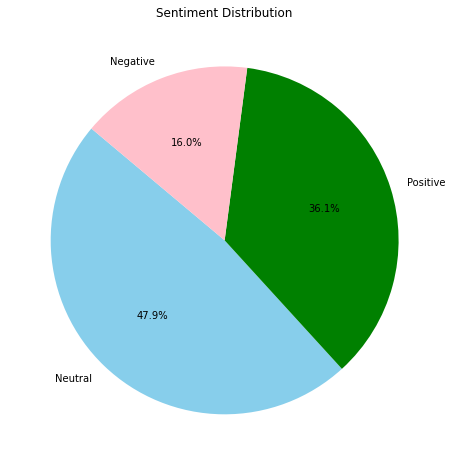

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
ax = plt.subplot(111)
ax.set_facecolor('white')
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'green', 'pink'])
plt.title('Sentiment Distribution')
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
plt.show()


### VADER Model

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lorrah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()


In [ ]:
def get_vader_sentiment(text):
    # Get sentiment scores
    sentiment_dict = sia.polarity_scores(text)
    return sentiment_dict['compound']

# Apply the function to your DataFrame
clean_comments_df['vader_sentiment'] = clean_comments_df['cleaned_text'].apply(get_vader_sentiment)


In [ ]:
# Display the first few entries to see the VADER sentiment scores
print(clean_comments_df.head())

# Compute average sentiment score using VADER
average_vader_sentiment = clean_comments_df['vader_sentiment'].mean()
print("Average VADER Sentiment:", average_vader_sentiment)


                                        comment_text               author  \
0  I watched an youtube video on Quest 3 and then...        @Andrew-sx4re   
1  it’s not becoming mainstream till that battery...         @Cryptic0III   
2  <b>***Don&#39;t be a silly customer to buy iph...           @jaskenlee   
3  The major problems are nothing can be connecte...  @Not-A-Woke-Liberal   
4                              Very well explained 😊     @kwesigaalex4765   

   likes             timestamp  \
0      0  2024-04-29T17:52:18Z   
1      0  2024-04-29T08:19:15Z   
2      0  2024-04-29T01:12:46Z   
3      0  2024-04-28T18:30:24Z   
4      0  2024-04-28T17:43:44Z   

                                        cleaned_text  \
0  i watched an youtube video on quest  and then ...   
1  its not becoming mainstream till that battery ...   
2  dont be a silly customer to buy iphone anymore...   
3  the major problems are nothing can be connecte...   
4                               very well explained 

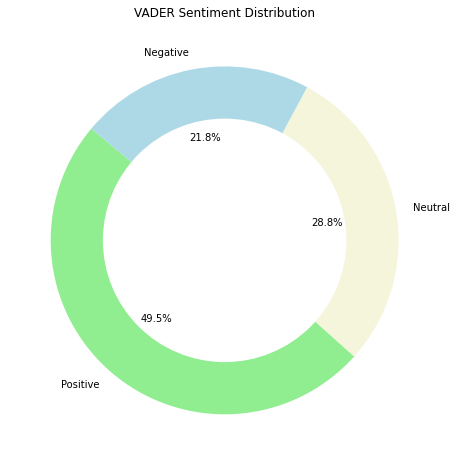

In [ ]:
# vader_sentiment_counts = clean_comments_df['vader_sentiment_category'].value_counts()

# Create a pie chart with a white background
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')  # Set the figure size and background color

# Pie chart code
wedges, texts, autotexts = plt.pie(vader_sentiment_counts, labels=vader_sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'beige', 'lightblue'])

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Set the axes background color
ax.set_facecolor('white') 

plt.title('VADER Sentiment Distribution', color='black')  

for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')

plt.show()


In [ ]:
clean_comments_df.to_csv('clean_comments_with_vader.csv', index=False)


In [ ]:
clean_comments_df = pd.read_csv('clean_comments_with_vader.csv')


### SUPPORT VECTOR MACHINES (SVM)

In [ ]:
import numpy
print(numpy.__version__)


1.24.4
